In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifetimes

In [53]:
plt.rcParams['figure.dpi'] = 140
sns.set(font='IPAGothic')
df = pd.read_csv('ecom_cosmetics_cart_purchase_labels.csv')
df['event_time'] = pd.to_datetime(df['event_time'])

In [54]:
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchased
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,276102,1
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,276102,1
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,523745,0
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,276102,1
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,523745,0


<AxesSubplot:xlabel='event_time'>

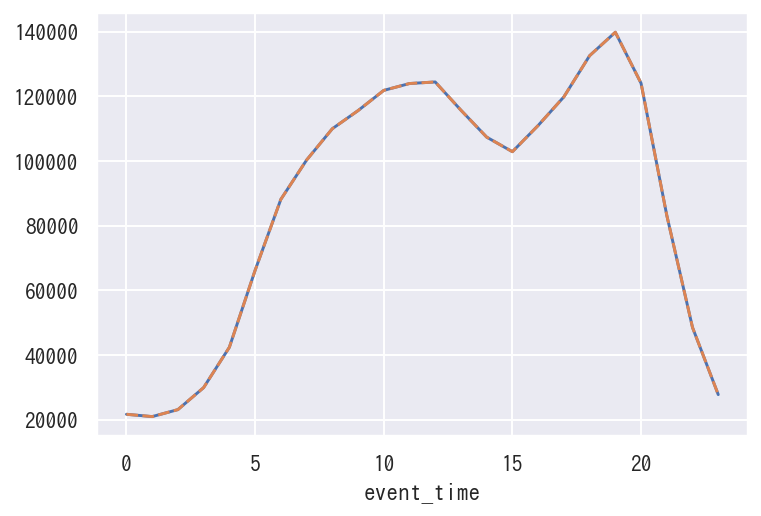

In [56]:
sns.lineplot(data=df[['event_time', 'user_id']].groupby(df['event_time'].dt.hour).count(), legend=False)


In [57]:
users = df[['user_id', 'price']].groupby('user_id').sum().reset_index()
users['rank'] = pd.qcut(users['price'],
                       q=10,
                       labels=False)
users.head(5)

,user_id,price,rank
0,4103071,0.67,0
1,5493470,17.93,5
2,6217356,7.97,3
3,8846226,87.51,8
4,9794320,261.27,9


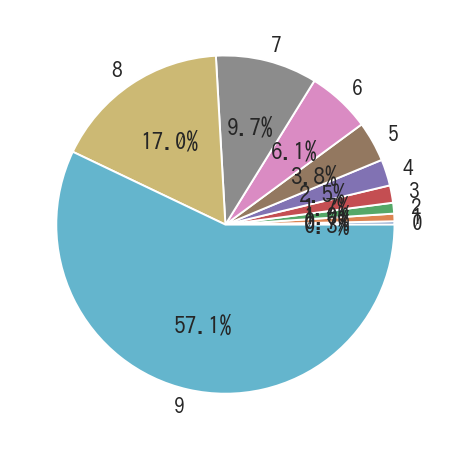

In [60]:
ranks = users[['price', 'rank']].groupby('rank').sum().reset_index()
plt.pie(ranks['price'],
       labels=ranks['rank'],
       autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='event_time'>

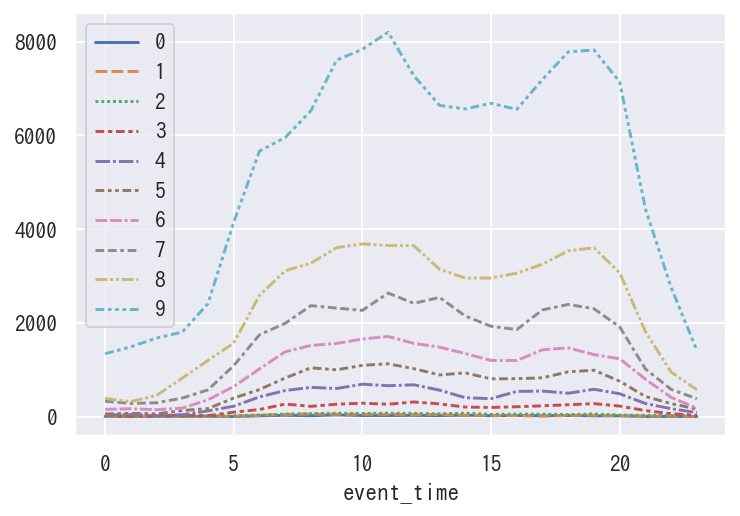

In [61]:
df = pd.merge(df, users, how='left', on='user_id')
hours_df = pd.DataFrame(index=df
                        .groupby(df['event_time'].dt.hour)
                        .sum()
                       .index)
for x in range(10):
    hours_df[str(x)] = df.query('rank == ' + str(x)).groupby(df['event_time'].dt.hour).sum()['purchased']

sns.lineplot(data=hours_df)